## Data Mining for Business Intelligence


In [132]:
pip install jupyterthemes


The following command must be run outside of the IPython shell:

    $ pip install jupyterthemes

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


### Importing the essential libraries and functions

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_samples



### Set Random Seed for reproducibility , and import the dataset

In [37]:
random_state= 0
automobiles = pd.read_csv('automobiles.csv')
automobiles.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500


The dataset contains engine and model information for 397 cars. We attempt to cluster the data
and find some structure in the raw dataset. We will drop the car_name from our analysis
because it may not be a good conributor to cluster formation.

### Rename the columns and drop categorical [Car Names]

In [114]:
automobiles_copy = automobiles.copy()
ac = automobiles_copy
ac.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model_year', 'origin', 'car_name']
x = ac.drop(['car_name'],axis=1)


In [115]:
x.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,15.0,8,350.0,165.0,3693,11.5,70,1
1,18.0,8,318.0,150.0,3436,11.0,70,1
2,16.0,8,304.0,150.0,3433,12.0,70,1
3,17.0,8,302.0,140.0,3449,10.5,70,1
4,15.0,8,429.0,198.0,4341,10.0,70,1


### Hopkin Statistic is used to indicate the 'clusterability' of a dataset with values ranging from zero to one. Internally the measure compares summation of each point to p samples of dataset against p random points.


In [116]:
hopkins(x)

0.8290147823101627

The hopkins statistic in above dataset is 85% , something close to 50% is as good as random. 85% indicates good clustering tendency of our dataset.  
Now we weill go ahead and carry out clustering using the following two algorithms :  

1. k-means , the most frequently used algorithm for clustering analysis
2. Expectation Maximization algorithm based on Gaussian Kernal density estimation



## First Step is to choose a good number of clusters. Plotting the number SSE against number of clusters.

In [118]:
# Initializing Kmeans for different values of k
score = np.zeros(10)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit_predict(x)
    score[i] = -kmeans.score(x)
    print("SSE for k=",i,":", round(score[i],2))

SSE for k= 1 : 289339000.91
SSE for k= 2 : 74147256.82
SSE for k= 3 : 34074580.35
SSE for k= 4 : 19053433.22
SSE for k= 5 : 13715025.22
SSE for k= 6 : 10315953.41
SSE for k= 7 : 7671242.11
SSE for k= 8 : 5624873.15
SSE for k= 9 : 4697081.46


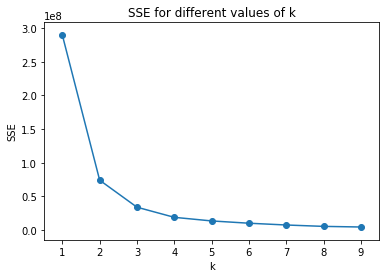

In [123]:
plt.plot(range(1,10),score[1:10])
plt.scatter(range(1,10),score[1:10])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

### Since there is no significant reduction in SSE after 3~4 clusters , so  3 to 4 clusters for each algorithm seems like a good choice for our dataset clustering.


Since it's not meaningful to plot more than 2 dimensions on a plane , thus we will primariliy work with statistics of various algorithms in our reports , rather than visual representations of our clusterings. 

## CLUSTERING AND SILHOUTTE COEFFICIENTS :
Here we try to compute the silhoutte coefficient of our clusters, which indicates quality of clusters. 
Silhoutte coefficient accounts for both cohesion (how close packed clusters are) , and separation
(how well separated clusters are)

We try and compute mean silhoutte scores for both K - Means and EM algorithms for various 
number of clusters and compare them

### K Means Algorithm :

In [127]:
num_clusters = list(range(2,10))
sil_vals_kmeans ={}
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state = random_state)
    y_pred = kmeans.fit_predict(x)
    mean = np.mean(silhouette_samples(x,y_pred))
    sil_vals_kmeans[n] =mean

ordered_sil_vals = collections.OrderedDict(sorted(sil_vals_kmeans.items()))
ordered_sil_vals

OrderedDict([(2, 0.6350449932064359),
             (3, 0.5862382676836432),
             (4, 0.578662236745216),
             (5, 0.5510290384939304),
             (6, 0.524632429004843),
             (7, 0.5027932050984207),
             (8, 0.5240941934414182),
             (9, 0.5119229964460257)])

### Gaussian Mixture Algorithm (Expectation Maximization - EM) :

In [129]:
sil_val_em ={}
for n in num_clusters:
    gmm = GaussianMixture(n_components=n, covariance_type='full')
    y_pred = gmm.fit_predict(x)
    mean = np.mean(silhouette_samples(x,y_pred))
    sil_val_em[n]= mean
ordered_em_vals = collections.OrderedDict(sorted(sil_val_em.items()))
ordered_em_vals

OrderedDict([(2, 0.25599001007621863),
             (3, 0.42155370460134006),
             (4, 0.28921936680639826),
             (5, 0.13776956329578535),
             (6, -0.0627325674197474),
             (7, -0.03435609265735899),
             (8, -0.10067543873290753),
             (9, -0.11171432290270686)])

### Champion Challenge

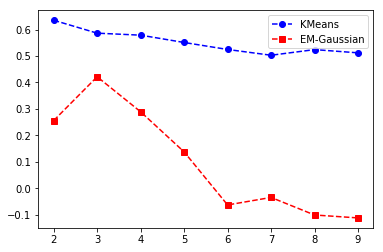

In [148]:
x = ordered_em_vals.keys()
y1 = ordered_sil_vals.values()
y2 = ordered_em_vals.values()
plt.plot(x,y1,'--bo',label='KMeans')
plt.plot(x,y2,'--rs' , label='EM-Gaussian')
plt.legend(loc='upper right')
plt.show()



As we can see above , KMeans has better quality clusters for all provided cluster sizes. 
Additionally , as we had seen in our earlier SSE optimization , the cluster performance
peaks when number of clusters = 4 , in both the cases.

## Conclusion :
### KMeans algorithm is more suited for clustering of our particular dataset

## ----------------------------------END OF MAIN REPORT---------------------------------------

####  Below Function used to compute Hopkin Statistic used in the first step

### Hopkin Statistic is used to indicate the 'clusterability' of a dataset with values ranging from zero to one. Internally the measure compares summation of each point to p samples of dataset against p random points.


In [108]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    X=X.values
    n = X.shape[0] #rows
    d = X.shape[1] #cols
    p = int(0.1 * n) #considering 10% of points
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n), p) 
 
    uj = []
    wj = []
    for j in range(0, p):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).
                                    reshape(1, -1), 2, return_distance=True)
        uj.append(u_dist[0][1]) #distances to nearest neighbors in random data
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wj.append(w_dist[0][1]) #distances to nearest neighbors in real data
 
    H = sum(uj) / (sum(uj) + sum(wj))
    if isnan(H):
        print (uj, wj)
        H = 0
 
    return H

In [109]:
hopkins(x)

0.8516474973021869

#### Works Cited :  
Validating Clusters using the Hopkins Statistic from IEEE 2004
